In [ ]:
# Import necessary libraries for data manipulation, visualization, machine learning preprocessing, and evaluation.
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Load the Telco Customer Churn dataset from the CSV file and create a copy for safe processing. Display the first 10 rows to inspect the data structure and values.
raw_df = pd.read_csv("Telco-Customer-Churn.csv")
df = raw_df.copy()

# Display first 10 rows
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
# Examine the data types and non-null counts for each column to understand the dataset structure. Also check for any missing values in the dataset.
df.info()
# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Handle data quality issues: Convert the TotalCharges column to numeric type (it may contain strings or spaces), coercing errors to NaN. Fill any missing values in TotalCharges with the median value.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Fill missing TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [ ]:
# Save the cleaned dataset (with original categorical values intact) to a CSV file specifically for use in Power BI, preserving readability for visualization.
df.to_csv("telco_churn_cleaned_powerbi.csv", index=False)

In [ ]:
# Encode categorical variables using LabelEncoder to convert string categories into numerical values suitable for machine learning algorithms.
categorical_cols = df.select_dtypes(include=['object']).columns

# Label Encoding for binary categories
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Standardize numerical features using StandardScaler to scale them to have a mean of 0 and standard deviation of 1, improving model performance.
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Convert the Churn column to binary integers (0 for 'No', 1 for 'Yes') to make it suitable for binary classification tasks. Verify the mapping by counting the values.
df['Churn'] = df['Churn'].astype(int)
# Verify mapping

# Verify mapping
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [ ]:
# Compute and display summary statistics (mean, std, min, max, etc.) for the numerical variables after standardization to understand their distributions.
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,-2.421273e-17,-6.406285e-17,-1.488074e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00,-9.991203e-01
25%,-9.516817e-01,-9.725399e-01,-8.298459e-01
50%,-1.372744e-01,1.857327e-01,-3.904632e-01
75%,9.214551e-01,8.338335e-01,6.642871e-01
max,1.613701e+00,1.794352e+00,2.826743e+00


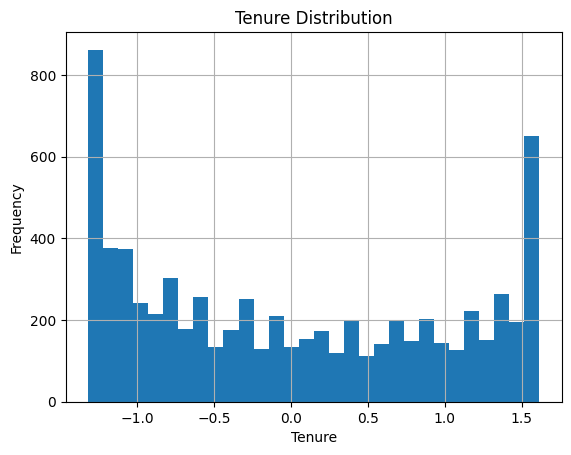

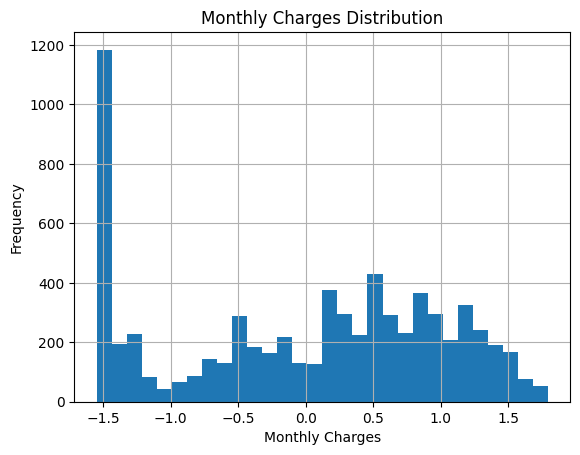

In [ ]:
# Plot histograms for the Tenure and MonthlyCharges columns to visualize their frequency distributions and identify patterns.
plt.figure()
df['tenure'].hist(bins=30)
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

plt.figure()
df['MonthlyCharges'].hist(bins=30)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

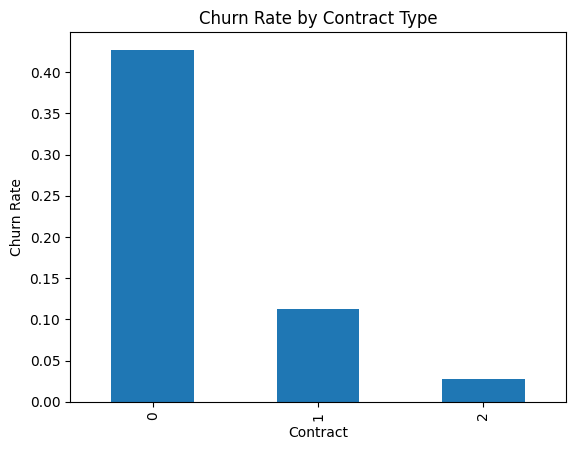

In [ ]:
# Calculate the churn rate (mean churn) grouped by contract type and plot it as a bar chart to show how churn varies by contract.
churn_by_contract = df.groupby('Contract')['Churn'].mean()
churn_by_contract.plot(kind='bar', title='Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()

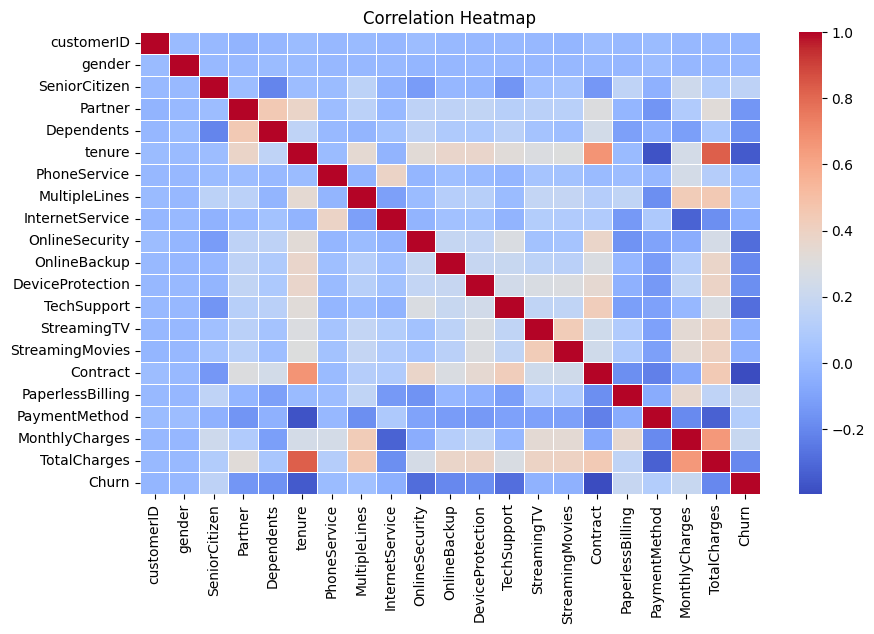

In [ ]:
# Create a correlation heatmap to visualize the pairwise correlations between all features in the dataset, helping identify relationships.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Print key insights derived from the exploratory data analysis, summarizing patterns observed in the data.
print("Customers with shorter tenure and higher monthly charges show higher churn.")
print("Contract type strongly influences churn, with month-to-month contracts churning more.")

Customers with shorter tenure and higher monthly charges show higher churn.
Contract type strongly influences churn, with month-to-month contracts churning more.


In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test) with a fixed random state for reproducibility in model evaluation.
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Logistic Regression model on the training data with increased max iterations to ensure convergence, then make predictions on the test set.
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)

c:\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Train a Random Forest Classifier model on the training data, make predictions on the test set, and compute predicted probabilities for churn.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Define a function to evaluate model performance by calculating accuracy, precision, recall, F1-score, and confusion matrix. Apply it to both Logistic Regression and Random Forest models.
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Evaluate both models
evaluate_model(y_test, log_preds, "Logistic Regression")
evaluate_model(y_test, rf_preds, "Random Forest")


Logistic Regression
Accuracy: 0.8161816891412349
Precision: 0.680379746835443
Recall: 0.5764075067024129
F1-score: 0.6240928882438317
Confusion Matrix:
 [[935 101]
 [158 215]]

Random Forest
Accuracy: 0.7955997161107168
Precision: 0.6523297491039427
Recall: 0.4879356568364611
F1-score: 0.558282208588957
Confusion Matrix:
 [[939  97]
 [191 182]]


In [ ]:
# Compute feature importance from the Random Forest model and display the top 10. Interpret the top features for both Random Forest and Logistic Regression, and print overall insights.
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).head(10)

#Part D Q3 Feature Interpretation
top_features = feature_importance.sort_values(ascending=False).head(5)
print("Top 5 random forest feature importances:")
print(top_features)

coef_series = pd.Series(log_model.coef_[0], index=X.columns)
top_positive = coef_series.sort_values(ascending=False).head(3)
top_negative = coef_series.sort_values().head(3)

print("\nLogistic regression features most associated with churn:")
print(top_positive)
print("\nLogistic regression features linked to retention:")
print(top_negative)

print(
    "\nInterpretation: Higher MonthlyCharges and lower tenure increase churn risk, "
    "while long-term contracts reduce churn likelihood. Customers on month-to-month "
    "contracts with higher charges should be prioritised for retention offers."
)

Top 5 random forest feature importances:
TotalCharges      0.157977
MonthlyCharges    0.147429
tenure            0.138392
customerID        0.127406
Contract          0.075732
dtype: float64

Logistic regression features most associated with churn:
MonthlyCharges      0.663014
TotalCharges        0.600671
PaperlessBilling    0.358326
dtype: float64

Logistic regression features linked to retention:
tenure         -1.318310
PhoneService   -0.998401
Contract       -0.724800
dtype: float64

Interpretation: Higher MonthlyCharges and lower tenure increase churn risk, while long-term contracts reduce churn likelihood. Customers on month-to-month contracts with higher charges should be prioritised for retention offers.


In [ ]:
# Save the fully processed dataset (encoded and scaled) to a CSV file for use in Power BI or further analysis.
df.to_csv("telco_churn_cleaned.csv", index=False)

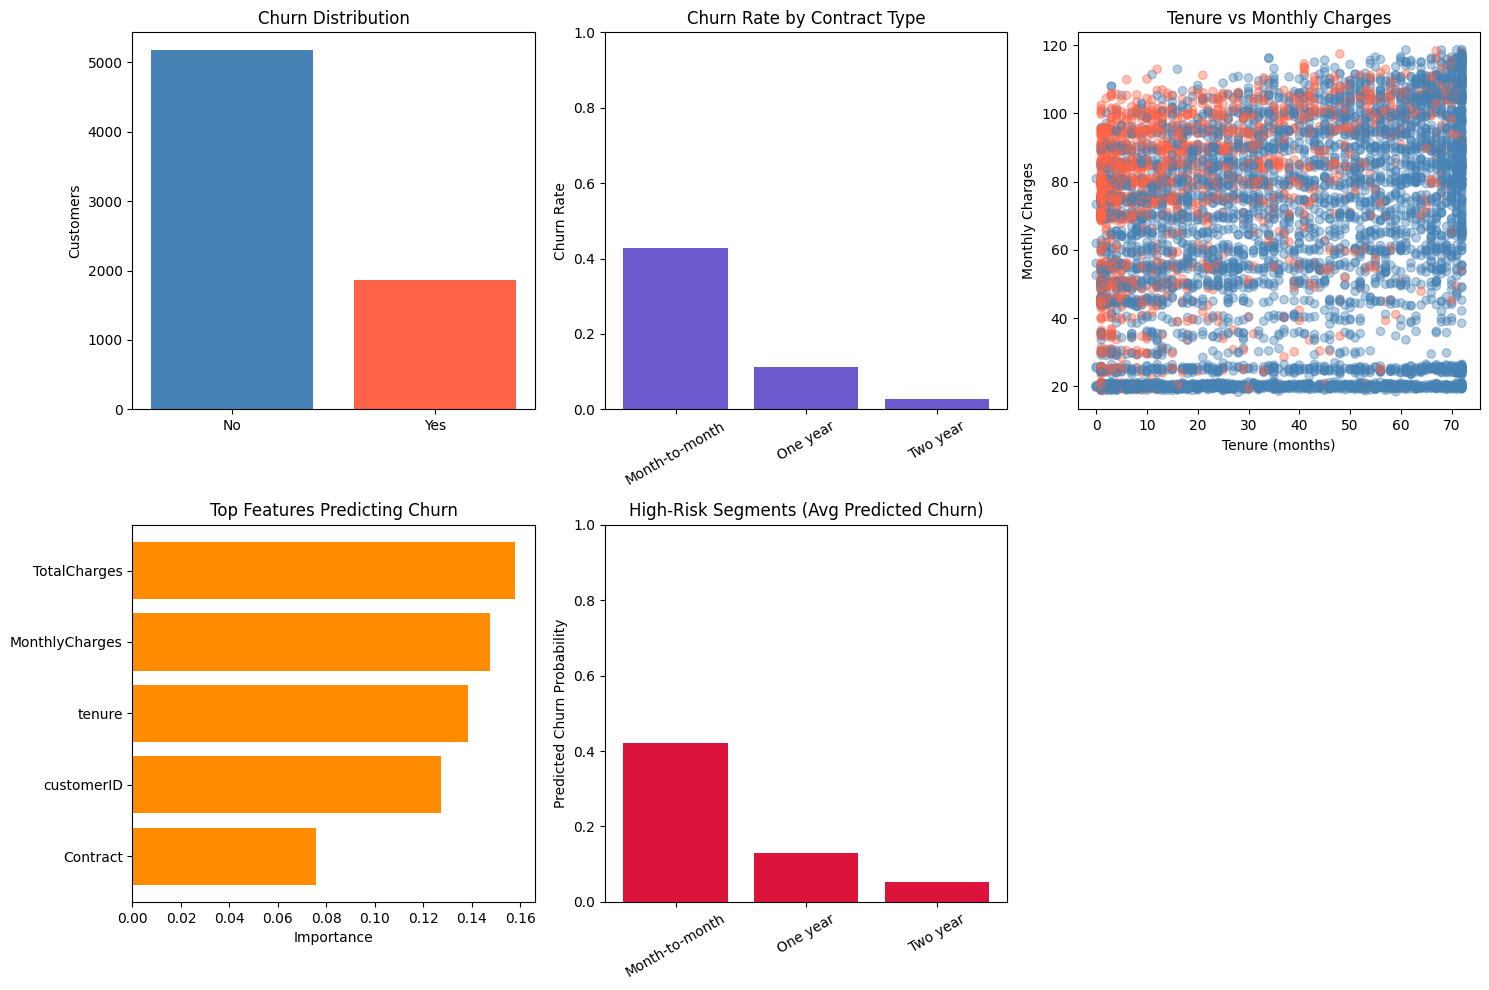

In [ ]:
# Create a dashboard of visualizations using matplotlib subplots, including churn distribution, churn rate by contract, scatter plot, top features, and high-risk segments.
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Churn distribution
churn_counts = raw_df['Churn'].value_counts()
axes[0, 0].bar(churn_counts.index, churn_counts.values, color=['steelblue', 'tomato'])
axes[0, 0].set_title('Churn Distribution')
axes[0, 0].set_ylabel('Customers')

# Churn rate by contract type
contract_churn = (
    raw_df.groupby('Contract')['Churn']
    .apply(lambda x: (x == 'Yes').mean())
    .sort_values(ascending=False)
)
axes[0, 1].bar(contract_churn.index, contract_churn.values, color='slateblue')
axes[0, 1].set_title('Churn Rate by Contract Type')
axes[0, 1].set_ylabel('Churn Rate')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].tick_params(axis='x', rotation=30)

# Tenure vs Monthly Charges scatter
colors = raw_df['Churn'].map({'No': 'steelblue', 'Yes': 'tomato'})
axes[0, 2].scatter(raw_df['tenure'], raw_df['MonthlyCharges'], c=colors, alpha=0.4)
axes[0, 2].set_title('Tenure vs Monthly Charges')
axes[0, 2].set_xlabel('Tenure (months)')
axes[0, 2].set_ylabel('Monthly Charges')

# Top features predicting churn
top_features_dash = feature_importance.sort_values(ascending=False).head(5)
axes[1, 0].barh(top_features_dash.index[::-1], top_features_dash.values[::-1], color='darkorange')
axes[1, 0].set_title('Top Features Predicting Churn')
axes[1, 0].set_xlabel('Importance')

# High-risk customer segments
risk_df = raw_df.loc[X_test.index].copy()
risk_df['Predicted_Churn_Prob'] = rf_probs
segment_risk = (
    risk_df.groupby('Contract')['Predicted_Churn_Prob']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)
axes[1, 1].bar(segment_risk.index, segment_risk.values, color='crimson')
axes[1, 1].set_title('High-Risk Segments (Avg Predicted Churn)')
axes[1, 1].set_ylabel('Predicted Churn Probability')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].tick_params(axis='x', rotation=30)

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Create a DataFrame from the top 10 feature importances, rename columns for clarity, and save it to a CSV file for import into Power BI.
fi_df = feature_importance.head(10).reset_index()
fi_df.columns = ['Feature', 'Importance']

fi_df.to_csv("churn_feature_importance.csv", index=False)